In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns


In [19]:
data = pd.read_csv('data.csv')
data.head()

/tmp/ipykernel_2036/3905774251.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [20]:
data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [21]:
columns = ['Credit Score', 'Annual Income', 'Months since last delinquent', 'Bankruptcies', 'Tax Liens']
for col in columns:
    data[col] = data[col].fillna(data[col].median())

In [22]:
data.isna().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            4693
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       0
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                       0
Tax Liens                          0
dtype: int64

# filling median for string datatypes

In [23]:
data["Years in current job"].value_counts()

Years in current job
10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [24]:
data["Years in current job"] = data["Years in current job"].fillna(data["Years in current job"].mode()[0])

In [25]:
data.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [26]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,32.0,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,32.0,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [27]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,32.0,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,32.0,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,32.0,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [28]:
data_dict = data.to_dict()

In [29]:
data_dict = data.to_dict('index')

# Sorting based on credit scores

In [30]:
data_dict[0]

{'Loan ID': '6cf51492-02a2-423e-b93d-676f05b9ad53',
 'Customer ID': '7c202b37-2add-44e8-9aea-d5b119aea935',
 'Loan Status': 'Charged Off',
 'Current Loan Amount': 12232,
 'Term': 'Short Term',
 'Credit Score': 7280.0,
 'Years in current job': '< 1 year',
 'Home Ownership': 'Rent',
 'Annual Income': 46643.0,
 'Purpose': 'Debt Consolidation',
 'Monthly Debt': '777.39',
 'Years of Credit History': 18.0,
 'Months since last delinquent': 10.0,
 'Number of Open Accounts': 12,
 'Number of Credit Problems': 0,
 'Current Credit Balance': 6762,
 'Maximum Open Credit': '7946',
 'Bankruptcies': 0.0,
 'Tax Liens': 0.0}

In [31]:
algorithms_time = {}

In [32]:
def quick_sort(dictionary):
    if len(dictionary) <= 1:
        return dictionary
    pivot = dictionary[len(dictionary) // 2]['Credit Score']
    left = [x for x in dictionary if x['Credit Score'] < pivot]
    middle = [x for x in dictionary if x['Credit Score'] == pivot]
    right = [x for x in dictionary if x['Credit Score'] > pivot]
    return quick_sort(left) + middle + quick_sort(right)

start = time.time()
quick_sorted_data = quick_sort(list(data_dict.values()))
end = time.time() - start

algorithms_time.update({"quick_sort": end})



In [33]:
def merge_sort(dictionary):
    if len(dictionary) > 1:
        mid = len(dictionary) // 2
        left_half = dictionary[:mid]
        right_half = dictionary[mid:]

        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i]['Credit Score'] < right_half[j]['Credit Score']:
                dictionary[k] = left_half[i]
                i += 1
            else:
                dictionary[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            dictionary[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            dictionary[k] = right_half[j]
            j += 1
            k += 1

    return dictionary


start = time.time()
merge_sorted_data = merge_sort(list(data_dict.values()))
end = time.time() - start
algorithms_time.update({"merge_sort": end})

In [34]:
def insertion_sort(dictionary):
    for i in range(1, len(dictionary)):
        key = dictionary[i]
        j = i - 1
        while j >= 0 and key['Credit Score'] < dictionary[j]['Credit Score']:
            dictionary[j + 1] = dictionary[j]
            j -= 1
        dictionary[j + 1] = key
    return dictionary


start = time.time()
insertion_sorted_data = insertion_sort(list(data_dict.values()))
end = time.time() - start
algorithms_time.update({"insertion_sort": end})


In [35]:
def selection_sort(dictionary):
    for i in range(len(dictionary)):
        min_index = i
        for j in range(i + 1, len(dictionary)):
            if dictionary[j]['Credit Score'] < dictionary[min_index]['Credit Score']:
                min_index = j
        dictionary[i], dictionary[min_index] = dictionary[min_index], dictionary[i]
    return dictionary

start = time.time()
selection_sorted_data = selection_sort(list(data_dict.values()))
end = time.time() - start
algorithms_time.update({"selection_sort": end})


In [36]:
def bubble_sort(dictionary):
    n = len(dictionary)
    for i in range(n):
        for j in range(0, n - i - 1):
            if dictionary[j]['Credit Score'] > dictionary[j + 1]['Credit Score']:
                dictionary[j], dictionary[j + 1] = dictionary[j + 1], dictionary[j]
    return dictionary

start = time.time()
bubble_sorted_data = bubble_sort(list(data_dict.values()))
end = time.time() - start
algorithms_time.update({"bubble_sort": end})

In [54]:
algorithms_time

{'quick_sort': 0.34883880615234375,
 'merge_sort': 0.4832022190093994,
 'insertion_sort': 1397.5159645080566,
 'selection_sort': 1097.7897295951843,
 'bubble_sort': 1545.4566371440887}

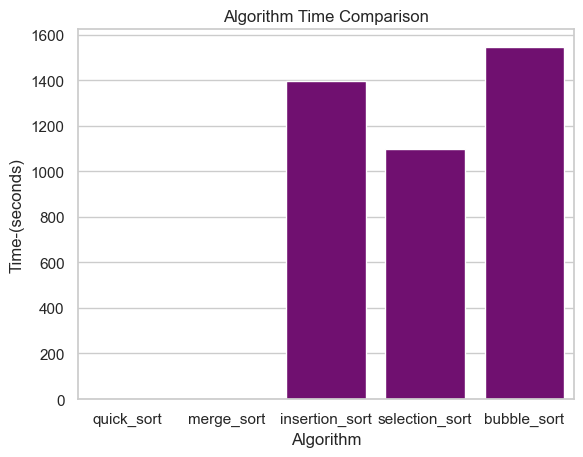

In [64]:
sns.barplot(x=list(algorithms_time.keys()), y=list(algorithms_time.values()), color='purple')
plt.xlabel('Algorithm')
plt.ylabel('Time-(seconds)')
plt.title('Algorithm Time Comparison')
plt.show()

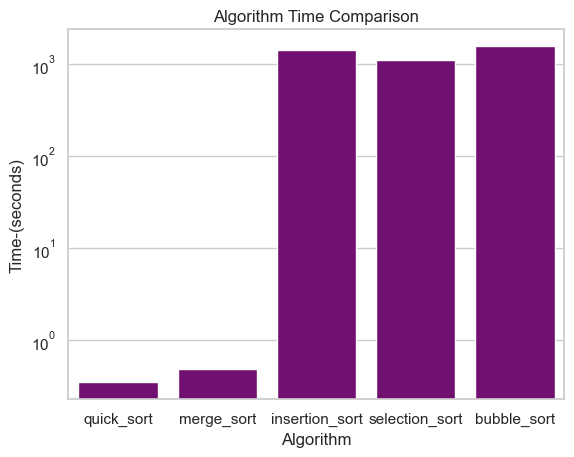

In [63]:
sns.barplot(x=list(algorithms_time.keys()), y=list(algorithms_time.values()), color='purple')
plt.xlabel('Algorithm')
plt.ylabel('Time-(seconds)')
plt.title('Algorithm Time Comparison')
plt.yscale('log') 
plt.show()
